Link to Medium blog post: https://medium.com/swlh/categorical-encoding-label-encoding-one-hot-encoding-115832c01b99

# Categorical Encoding: Label Encoding & One-Hot Encoding

Say a University conducted a survey to know if it’s students are comfortable with online lectures. The data that we have now is the Faculty each student is studying in, Academic year of the student, GPA and if he/she has opted for online classes.



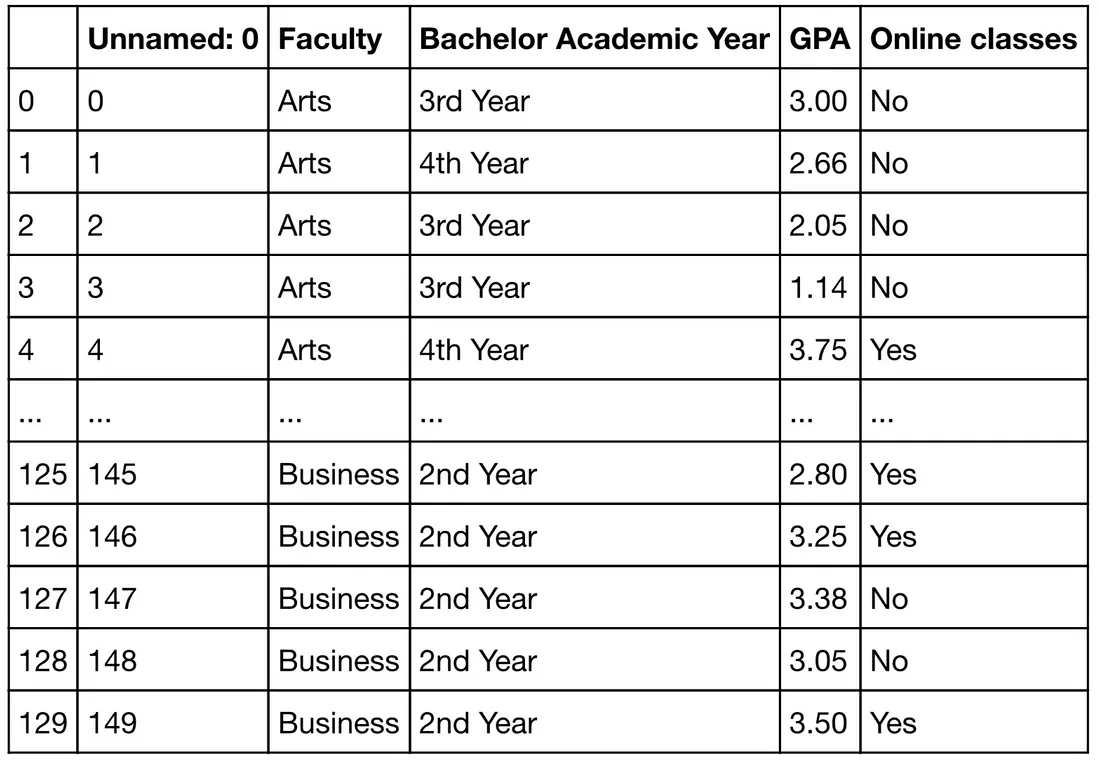

Looking at the dataset, we can say that they’re 3 categorical features to handle- Faculty, Bachelor Academic Year and Online classes.

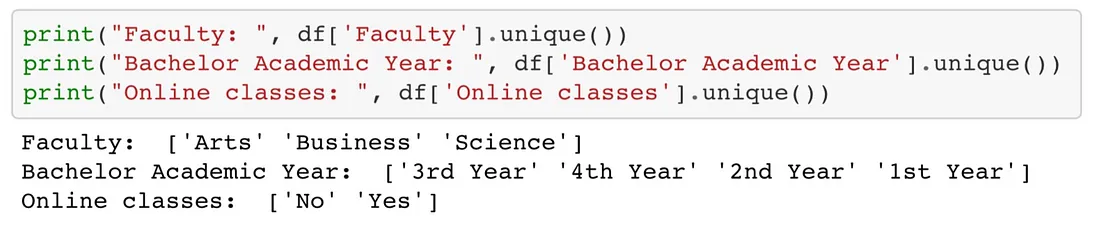

## Label Encoding

Label Encoding assigns all the unique values of the feature a positive integer value [0, 1, 2.. ] in an alphabetical order.
Python’s sklearn.preprocessing package makes label encoding really easy.

In [ ]:
from sklearn import preprocessing 
#create an object for LabelEncoder 
le = preprocessing.LabelEncoder()
#fit_transform() will return encoded values 
df['Faculty'] = le.fit_transform(df['Faculty'])

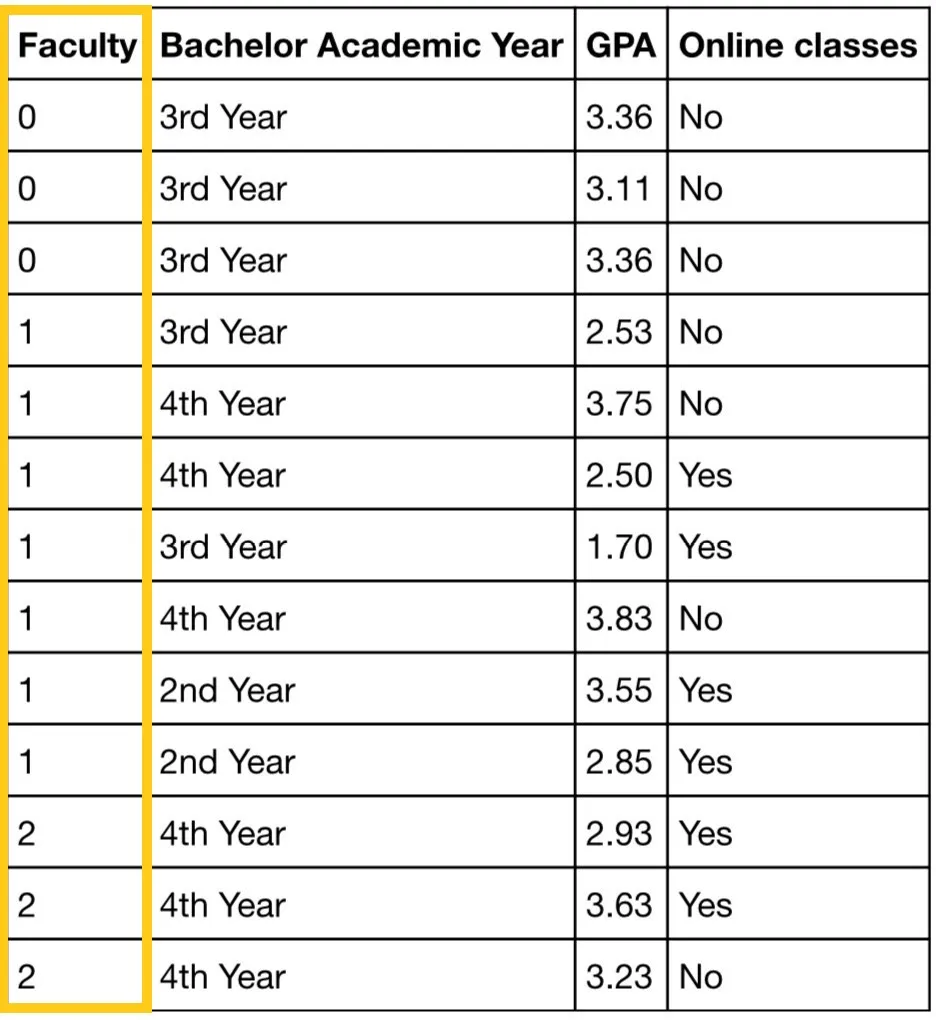

Limitation of this method is that it introduces a comparison/ hierarchy in the transformed data which doesn’t actually exist. This leads to a biased model.
In our case, Faculty names don’t have a rank originally but when label encoding is performed, numbers are assigned alphabetically creating a ranking. There are great chances that the model will treat Faculty according to the numbers assigned, Arts< Business < Science, i.e Science will be given more importance than Arts or Business.

But in case of ordinal variables, like Bachelor Academic Year where there exists an order originally, label encoding can used.
Here, 1st year< 2nd year< 3rd year< 4th year will make sense

In [ ]:
df['Bachelor Academic Year'] = le.fit_transform(df['Bachelor Academic Year'])

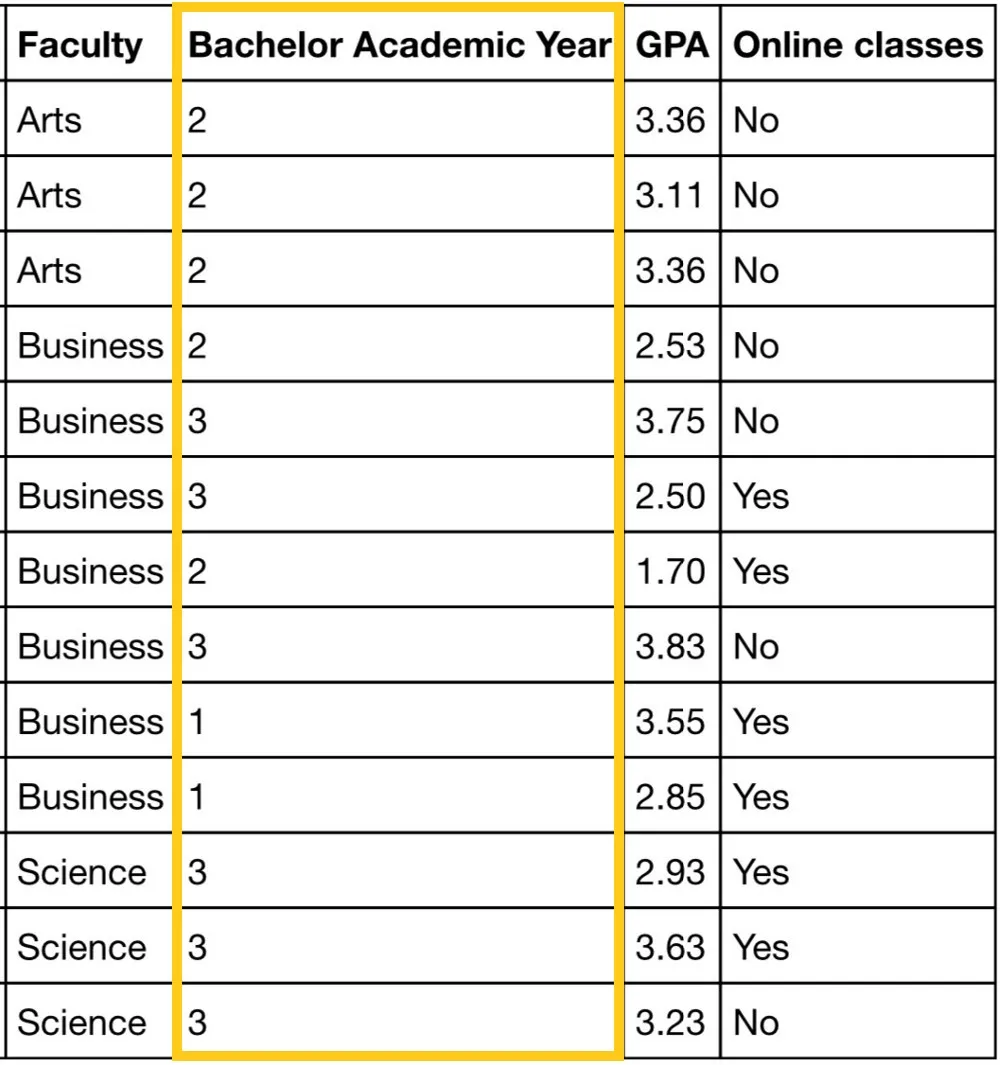

## One-Hot Encoding

This technique serves as a solution to the problem we had with nominal variables while performing label encoding.
In One-Hot Encoding, a dummy variable is created for each unique value of the categorical feature.
Talking about the same feature, Faculty, 3 dummies will be created for Arts, Business and Science. For each value of Faculty, 1 will be assigned to the dummy feature existing in the original data for that row and 0 will be assigned to the features that don’t.

There are 2 easy ways- one is using the same sklearn.preprocessing package.

In [ ]:
#create an object
ohe = preprocessing.OneHotEncoder()
#fit_transform() accepts a 2-D array, so reshape 1-D Faculty array into a 2-D array 
X = ohe.fit_transform(df['Faculty'].values.reshape(-1, 1)).toarray()
#create a dataframe for the encoded columns 
#join it with the original dataframe 
df_ohe = pd.DataFrame(X, columns = ["Faculty_"+df['Faculty'].unique()[i] for i in range(len(df['Faculty'].unique()))])
df = pd.concat([df, df_ohe], axis = 1)
df.drop('Faculty', axis = 1, inplace = True)

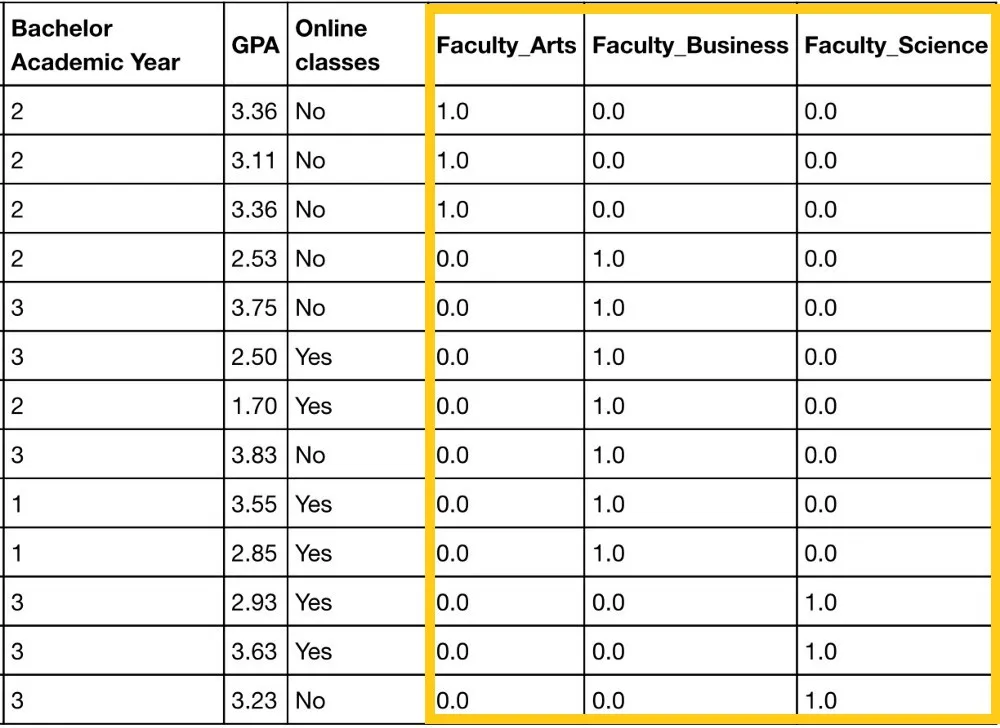

Another way to do this is by simply using get_dummies() method of Pandas.



In [ ]:
Y = pd.get_dummies(df['Online classes'], prefix = 'Online classes')
df = pd.concat([df, Y], axis = 1)
df.drop('Online classes', axis = 1, inplace = True)

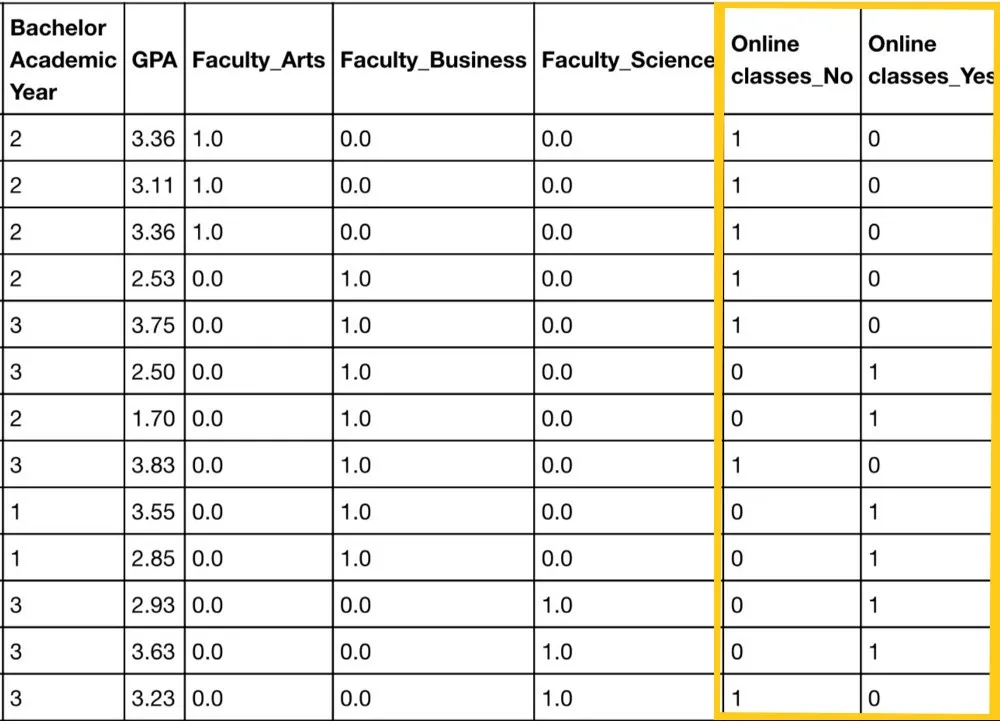

One-Hot Encoding can introduce multicollinearity between the features and it is harmful for machine learning algorithms like regression. This situation is usually called Dummy Variable Trap.
Multicollinearity is when 2 or more independent features are correlated, ie. dependent on each other.
To check for multicollinearity, Variance Inflation Factor VIF can be used.
Mathematically,

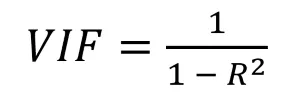

- VIF = 1 Very Less Multicollinearity
- 1 < VIF < 5 Moderate Multicollinearity
- VIF > 5 Extreme Multicollinearity

So, if you get VIF > 5 for any of the features, you’ll know that there’s multicollinearity in your data and to get rid of it just drop a column.